In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

df = pd.read_csv("C:\\Users\\Fredrik\\vscode_projects\\Projects\\NFHS_Project\\Data\\processed\\NFHS4_final.csv")

ID_cols = ["state", "district", "rural_urban", "households", "women", "men"]
Feature_cols = [c for c in df.columns if c not in ID_cols]
TARGET = "stunting"

print(f"   Loaded: {df.shape}")
print(f"   States : {df['state'].nunique()}")
print(f"   Districts: {df['district'].nunique()}")
df.head()

   Loaded: (607, 93)
   States : 32
   Districts: 601


,state,district,households,women,men,rural_urban,female_school_att,pct_below_15yrs,sex_ratio,sex_ratio_birth,...,bs_vhigh_men,bp_mild_women,bp_mod_women,bp_sev_women,bp_mild_men,bp_mod_men,bp_sev_men,cancer_cervix,cancer_breast,cancer_oral
0,AN,Nicobars,813.0,1019.0,164.0,Rural,77.2,25.4,957.0,1060.0,...,2.2,18.6,2.1,1.0,36.7,4.6,1.7,8.3,3.0,9.3
1,AN,North & Middle Andaman,796.0,842.0,128.0,Rural,83.8,22.6,951.0,975.0,...,10.7,5.9,1.1,0.2,13.9,2.3,2.4,10.6,12.4,21.2
2,AN,South Andaman,804.0,950.0,119.0,Both,85.8,24.2,989.0,794.0,...,9.8,6.5,1.3,0.8,22.4,3.6,4.6,28.6,13.2,25.3
3,AP,Anantapur,784.0,795.0,100.0,Rural,56.9,24.0,1000.0,1196.0,...,5.1,9.2,1.8,0.9,13.9,4.9,3.9,41.9,4.9,11.7
4,AP,Chittoor,773.0,740.0,95.0,Rural,65.0,23.4,1079.0,1168.0,...,4.7,6.1,1.6,0.1,9.9,4.5,0.0,26.8,2.5,7.8


C:\Users\Fredrik\AppData\Local\Temp\ipykernel_12124\4060064027.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(plot_data, labels=labels, patch_artist=True,boxprops=dict(facecolor="#AED6F1"),medianprops=dict(color="#E74C3C", linewidth=2))


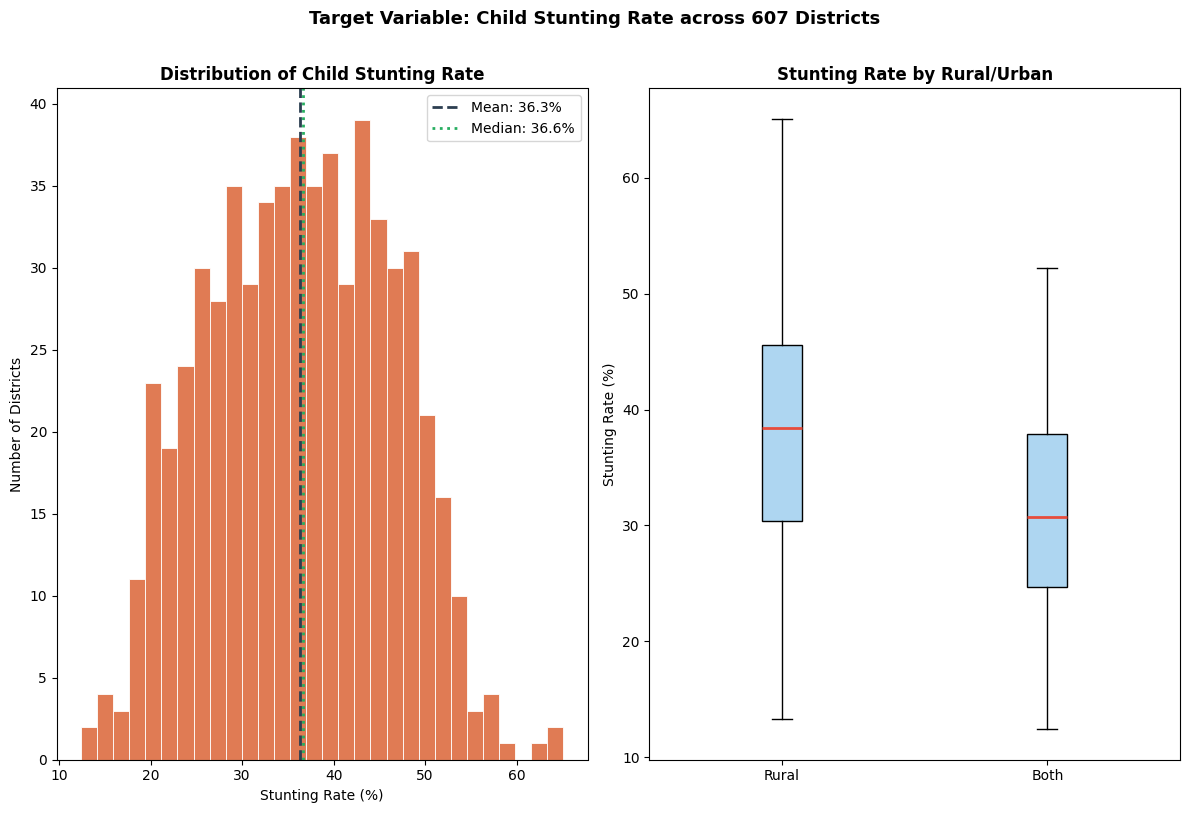

  Mean   : 36.3%
  Median : 36.6%
  Std    : 9.9%
  Min    : 12.4%  Max: 65.1%


In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Histogram
axes[0].hist(df[TARGET].dropna(), bins=30,color="#E07B54", edgecolor="white", linewidth=0.6)
axes[0].axvline(df[TARGET].mean(),   color="#2C3E50", lw=2,linestyle="--", label=f"Mean: {df[TARGET].mean():.1f}%")
axes[0].axvline(df[TARGET].median(), color="#27AE60", lw=2,linestyle=":",  label=f"Median: {df[TARGET].median():.1f}%")
axes[0].set_title("Distribution of Child Stunting Rate", fontweight="bold")
axes[0].set_xlabel("Stunting Rate (%)")
axes[0].set_ylabel("Number of Districts")
axes[0].legend()

# Boxplot by rural_urban classification
plot_data = [df[df["rural_urban"] == cat][TARGET].dropna()for cat in df["rural_urban"].dropna().unique()]
labels = df["rural_urban"].dropna().unique().tolist()
axes[1].boxplot(plot_data, labels=labels, patch_artist=True,boxprops=dict(facecolor="#AED6F1"),medianprops=dict(color="#E74C3C", linewidth=2))
axes[1].set_title("Stunting Rate by Rural/Urban", fontweight="bold")
axes[1].set_ylabel("Stunting Rate (%)")

plt.suptitle("Target Variable: Child Stunting Rate across 607 Districts",
             fontsize=13, fontweight="bold", y=1.01)
plt.tight_layout()
plt.savefig("C:\\Users\\Fredrik\\vscode_projects\\Projects\\NFHS_Project\\Outputs\\figures\\01_target_distribution.png", dpi=150, bbox_inches="tight")
plt.show()
print(f"  Mean   : {df[TARGET].mean():.1f}%")
print(f"  Median : {df[TARGET].median():.1f}%")
print(f"  Std    : {df[TARGET].std():.1f}%")
print(f"  Min    : {df[TARGET].min():.1f}%  Max: {df[TARGET].max():.1f}%")

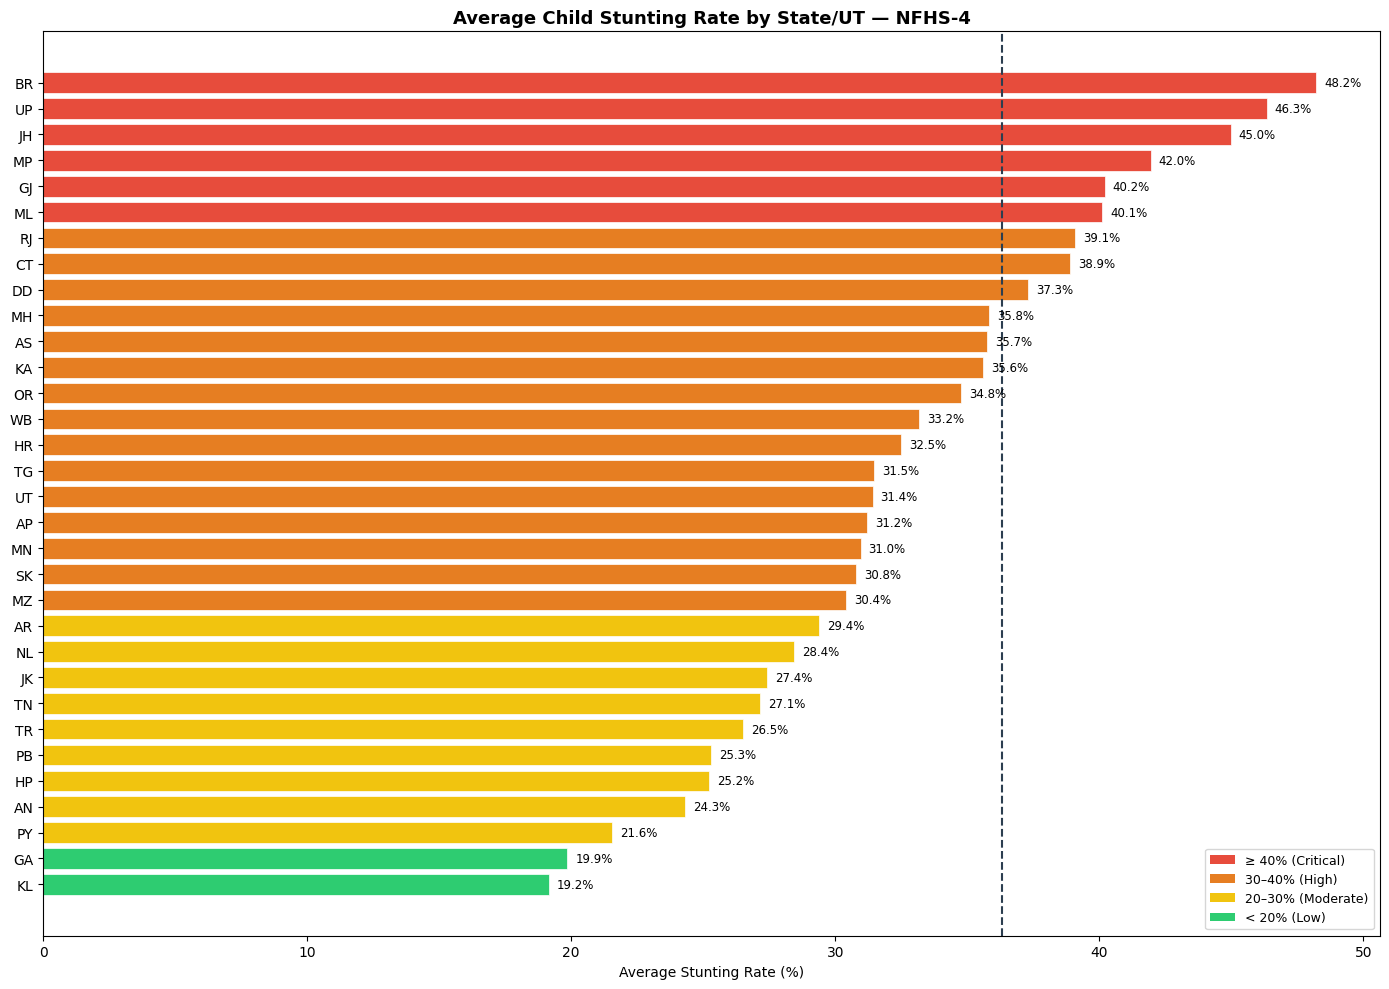

In [20]:
# State-level average stunting rates using a horizontal bar chart
state_stunting = (df.groupby("state")[TARGET].mean().sort_values(ascending=False).reset_index())
state_stunting.columns = ["state", "avg_stunting"]

fig, ax = plt.subplots(figsize=(14, 10))

colors = ["#E74C3C" if v >= 40 else "#E67E22" 
          if v >= 30
          else "#F1C40F" 
          if v >= 20 
          else "#2ECC71"
          for v in state_stunting["avg_stunting"]]

bars = ax.barh(state_stunting["state"], state_stunting["avg_stunting"], color=colors, edgecolor="white", linewidth=0.5)

ax.axvline(df[TARGET].mean(), color="#2C3E50", linestyle="--",linewidth=1.5, label=f"National Mean: {df[TARGET].mean():.1f}%")

# Value labels
for bar, val in zip(bars, state_stunting["avg_stunting"]):
    ax.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height() / 2, f"{val:.1f}%", va="center", fontsize=8.5)

ax.set_xlabel("Average Stunting Rate (%)")
ax.set_title("Average Child Stunting Rate by State/UT — NFHS-4", fontsize=13, fontweight="bold")
ax.legend()
ax.invert_yaxis()

# Legend for colors
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="#E74C3C", label="≥ 40% (Critical)"),
    Patch(facecolor="#E67E22", label="30–40% (High)"),
    Patch(facecolor="#F1C40F", label="20–30% (Moderate)"),
    Patch(facecolor="#2ECC71", label="< 20% (Low)"),
]
ax.legend(handles=legend_elements, loc="lower right", fontsize=9)

plt.tight_layout()
plt.savefig("C:\\Users\\Fredrik\\vscode_projects\\Projects\\NFHS_Project\\Outputs\\figures\\02_state_stunting.png", dpi=150, bbox_inches="tight")
plt.show()

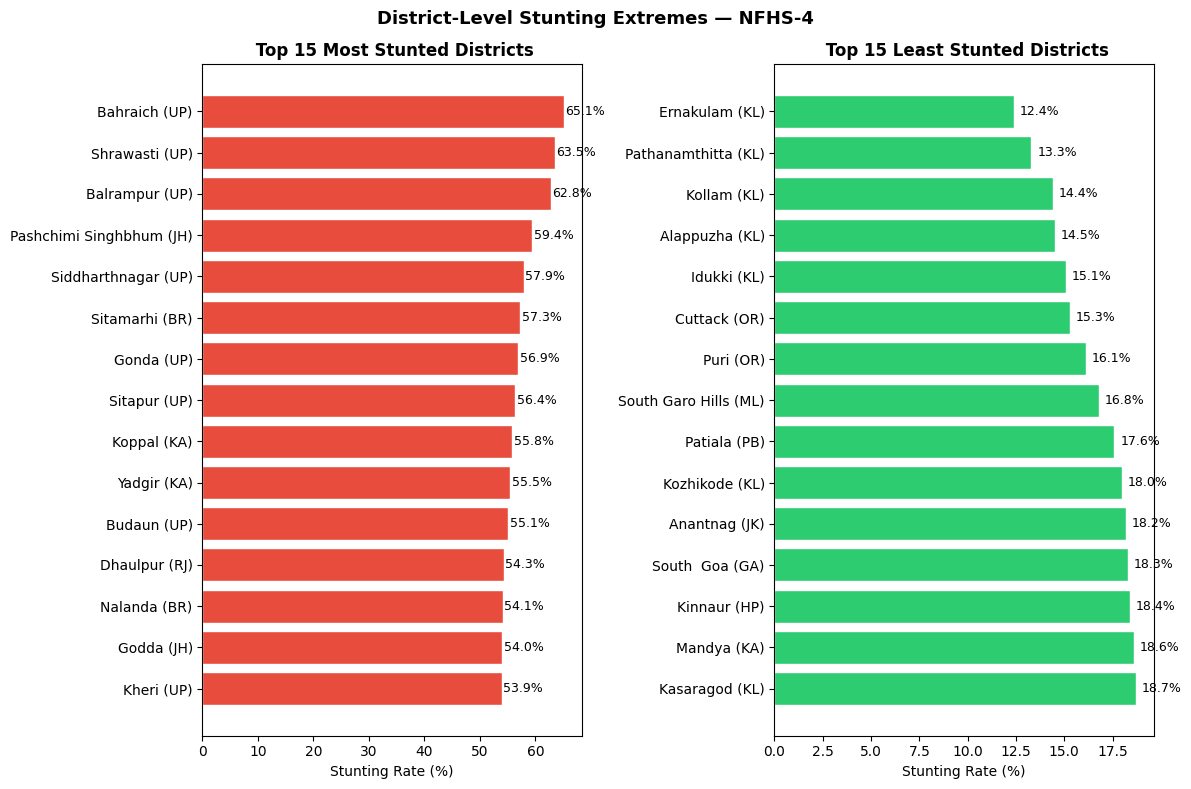

In [21]:
# District-level extremes in stunting rates using horizontal bar charts
top15    = df.nlargest(15,  TARGET)[["state", "district", TARGET]]
bottom15 = df.nsmallest(15, TARGET)[["state", "district", TARGET]]

fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Most stunted
axes[0].barh(top15["district"] + " (" + top15["state"] + ")",top15[TARGET], color="#E74C3C", edgecolor="white")
axes[0].set_title(" Top 15 Most Stunted Districts", fontweight="bold")
axes[0].set_xlabel("Stunting Rate (%)")
axes[0].invert_yaxis()
for i, v in enumerate(top15[TARGET]):
    axes[0].text(v + 0.3, i, f"{v:.1f}%", va="center", fontsize=9)

# Least stunted
axes[1].barh(bottom15["district"] + " (" + bottom15["state"] + ")",bottom15[TARGET], color="#2ECC71", edgecolor="white")
axes[1].set_title(" Top 15 Least Stunted Districts", fontweight="bold")
axes[1].set_xlabel("Stunting Rate (%)")
axes[1].invert_yaxis()
for i, v in enumerate(bottom15[TARGET]):
    axes[1].text(v + 0.3, i, f"{v:.1f}%", va="center", fontsize=9)

plt.suptitle("District-Level Stunting Extremes — NFHS-4", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.savefig("C:\\Users\\Fredrik\\vscode_projects\\Projects\\NFHS_Project\\Outputs\\figures\\03_district_extremes.png", dpi=150, bbox_inches="tight")
plt.show()

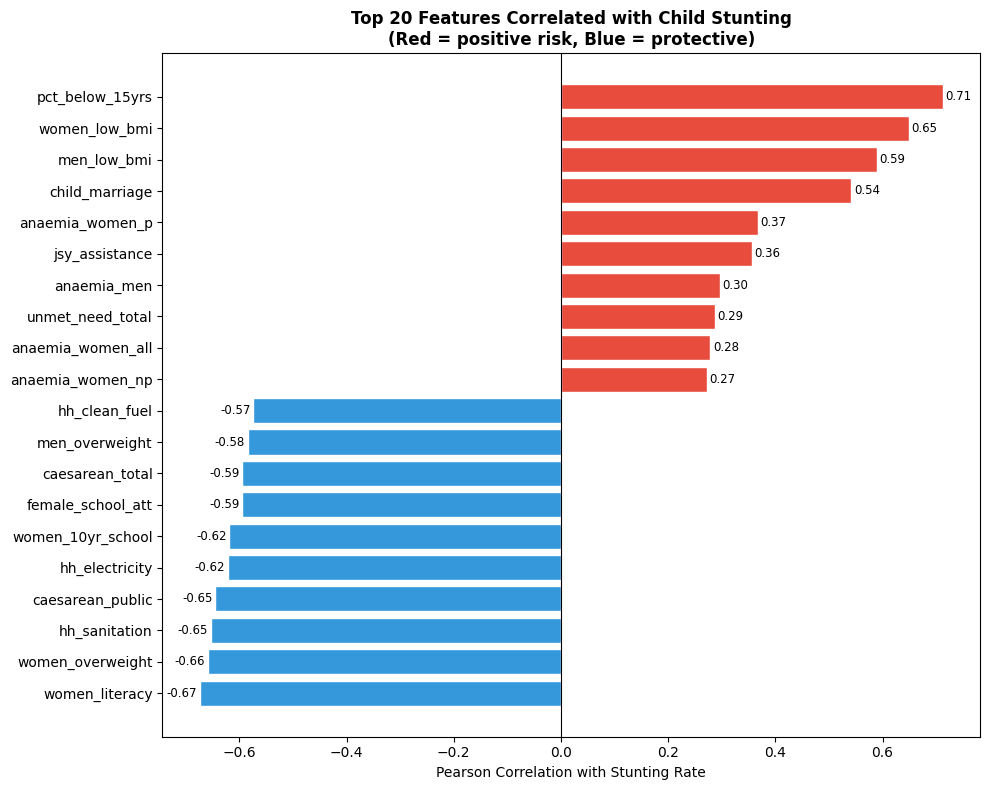


Top 10 POSITIVE correlators (risk factors):
anaemia_women_np     0.272003
anaemia_women_all    0.278595
unmet_need_total     0.286481
anaemia_men          0.296818
jsy_assistance       0.356283
anaemia_women_p      0.367385
child_marriage       0.541306
men_low_bmi          0.589322
women_low_bmi        0.648745
pct_below_15yrs      0.712458

Top 10 NEGATIVE correlators (protective factors):
women_literacy      -0.674176
women_overweight    -0.658684
hh_sanitation       -0.653621
caesarean_public    -0.645325
hh_electricity      -0.621786
women_10yr_school   -0.619100
female_school_att   -0.594778
caesarean_total     -0.594577
men_overweight      -0.584475
hh_clean_fuel       -0.574149


In [22]:
# Correlation analysis to identify top features associated with stunting
# Exclude related child outcomes to avoid data leakage
EXCLUDE = ["wasting", "severe_wasting", "underweight", "anaemia_children", "adequate_diet_total", "adequate_diet_bf"]

model_feats = [c for c in Feature_cols if c not in EXCLUDE + [TARGET]]

corr = (df[model_feats + [TARGET]].corr()[TARGET].drop(TARGET).sort_values())

# Take top 10 negative + top 10 positive
top_corr = pd.concat([corr.head(10), corr.tail(10)])

fig, ax = plt.subplots(figsize=(10, 8))
colors  = ["#E74C3C" if v > 0 else "#3498DB" for v in top_corr.values]
bars    = ax.barh(top_corr.index, top_corr.values, color=colors, edgecolor="white")

ax.axvline(0, color="black", linewidth=0.8)
ax.set_xlabel("Pearson Correlation with Stunting Rate")
ax.set_title("Top 20 Features Correlated with Child Stunting\n"
             "(Red = positive risk, Blue = protective)",fontweight="bold")

for bar, val in zip(bars, top_corr.values):
    xpos = bar.get_width() + 0.005 if val >= 0 else bar.get_width() - 0.005
    align = "left" if val >= 0 else "right"
    ax.text(xpos, bar.get_y() + bar.get_height() / 2,
            f"{val:.2f}", va="center", ha=align, fontsize=8.5)

plt.tight_layout()
plt.savefig("C:\\Users\\Fredrik\\vscode_projects\\Projects\\NFHS_Project\\Outputs\\figures\\04_correlation_stunting.png", dpi=150, bbox_inches="tight")
plt.show()

print("\nTop 10 POSITIVE correlators (risk factors):")
print(corr.tail(10).to_string())
print("\nTop 10 NEGATIVE correlators (protective factors):")
print(corr.head(10).to_string())

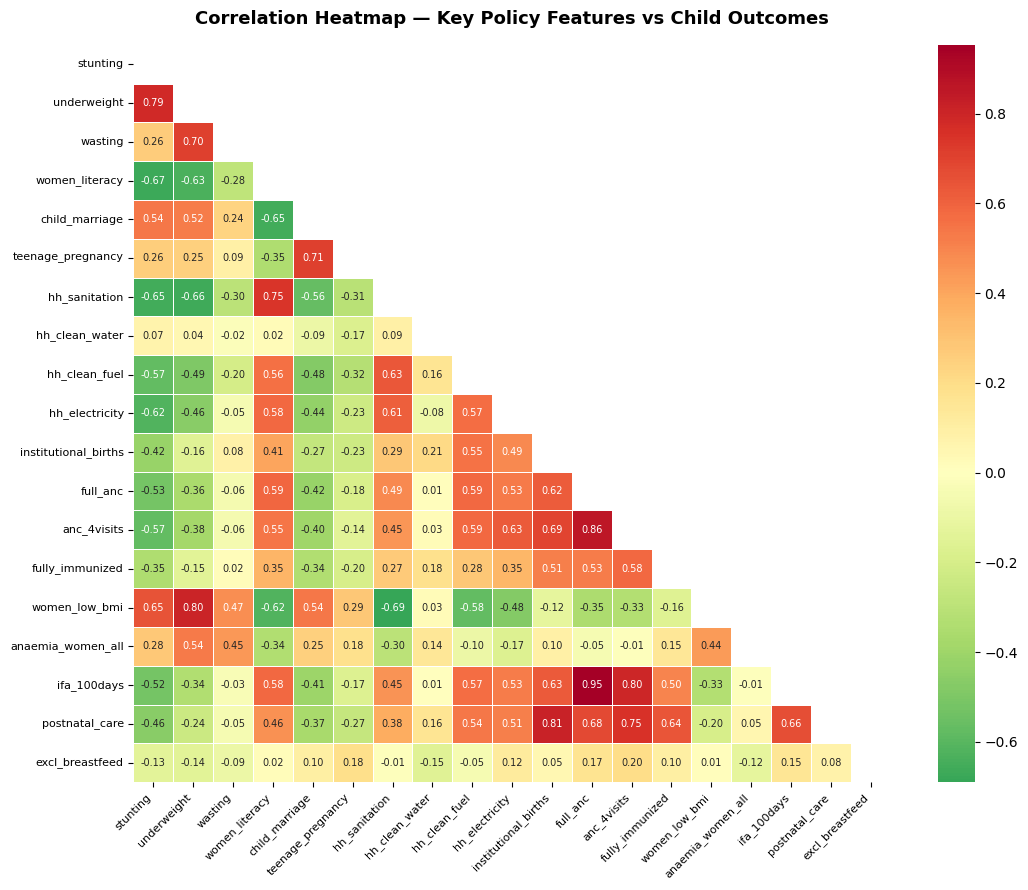

In [23]:
# correlation heatmap of key policy-relevant features vs stunting and related outcomes
Key_features = ["stunting", "underweight", "wasting",
                "women_literacy", "child_marriage", "teenage_pregnancy",
                "hh_sanitation", "hh_clean_water", "hh_clean_fuel", "hh_electricity",
                "institutional_births", "full_anc", "anc_4visits",
                "fully_immunized", "women_low_bmi", "anaemia_women_all",
                "ifa_100days", "postnatal_care","excl_breastfeed"]

corr_matrix = df[Key_features].corr()

fig, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))   # upper triangle mask

sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True, fmt=".2f",
    cmap="RdYlGn_r",
    center=0,
    linewidths=0.4,
    annot_kws={"size": 7},
    ax=ax
)
ax.set_title("Correlation Heatmap — Key Policy Features vs Child Outcomes",
             fontsize=13, fontweight="bold", pad=15)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig("C:\\Users\\Fredrik\\vscode_projects\\Projects\\NFHS_Project\\Outputs\\figures\\05_correlation_heatmap.png", dpi=150, bbox_inches="tight")
plt.show()

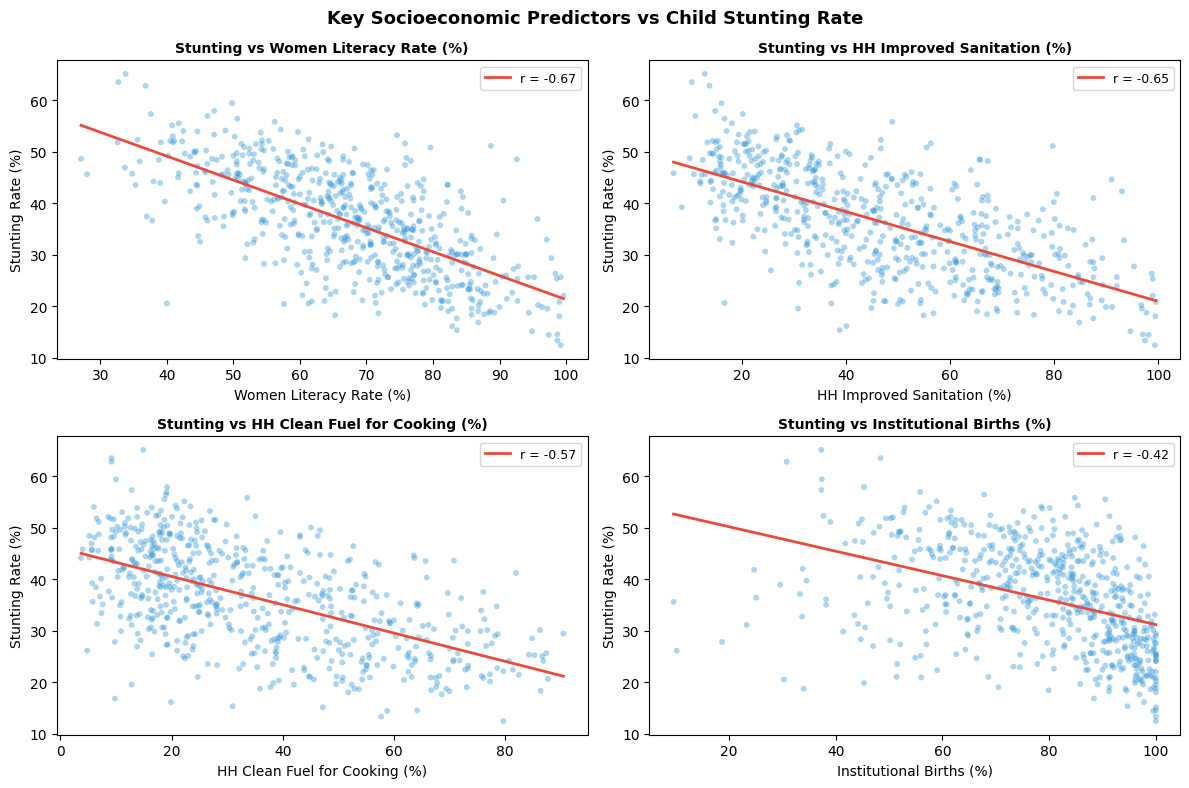

In [24]:
# Scatter plots of top predictors vs stunting with trend lines and correlation coefficients
Key_pairs = [("women_literacy",    "Women Literacy Rate (%)"),
             ("hh_sanitation",     "HH Improved Sanitation (%)"),
             ("hh_clean_fuel",     "HH Clean Fuel for Cooking (%)"),
             ("institutional_births", "Institutional Births (%)"), ]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (feat, label) in enumerate(Key_pairs):
    axes[i].scatter(df[feat], df[TARGET], alpha=0.4, s=18, color="#3498DB", edgecolors="none")

    # Trend line
    m, b   = np.polyfit(df[feat].dropna(), df[TARGET][df[feat].notna()], 1)
    x_line = np.linspace(df[feat].min(), df[feat].max(), 100)
    axes[i].plot(x_line, m * x_line + b, color="#E74C3C",
                 linewidth=2, label=f"r = {df[[feat, TARGET]].corr().iloc[0,1]:.2f}")

    axes[i].set_xlabel(label, fontsize=10)
    axes[i].set_ylabel("Stunting Rate (%)", fontsize=10)
    axes[i].set_title(f"Stunting vs {label}", fontweight="bold", fontsize=10)
    axes[i].legend(fontsize=9)

plt.suptitle("Key Socioeconomic Predictors vs Child Stunting Rate", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.savefig("C:\\Users\\Fredrik\\vscode_projects\\Projects\\NFHS_Project\\Outputs\\figures\\06_scatter_predictors.png", dpi=150, bbox_inches="tight")
plt.show()

C:\Users\Fredrik\AppData\Local\Temp\ipykernel_12124\1737371147.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(tier_counts.index, rotation=15, ha="right")


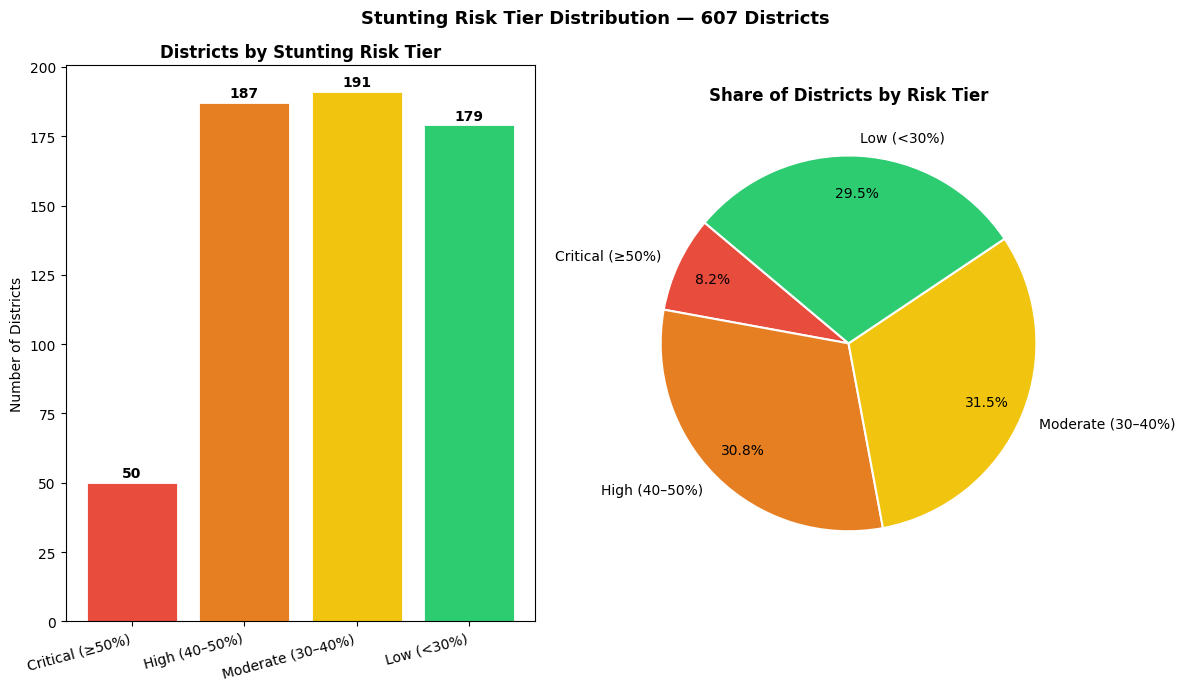

stunting_tier
Critical (≥50%)       50
High (40–50%)        187
Moderate (30–40%)    191
Low (<30%)           179

237 districts are High or Critical risk


In [25]:
# Create stunting risk tiers based on thresholds commonly used in public health
def stunting_tier(val):
    if val >= 50:   return "Critical (≥50%)"
    elif val >= 40: return "High (40–50%)"
    elif val >= 30: return "Moderate (30–40%)"
    else:           return "Low (<30%)"

df["stunting_tier"] = df["stunting"].apply(stunting_tier)

tier_order  = ["Critical (≥50%)", "High (40–50%)", "Moderate (30–40%)", "Low (<30%)"]
tier_colors = ["#E74C3C", "#E67E22", "#F1C40F", "#2ECC71"]
tier_counts = df["stunting_tier"].value_counts().reindex(tier_order)

fig, axes = plt.subplots(1, 2, figsize=(12, 7))

# Bar chart
axes[0].bar(tier_counts.index, tier_counts.values,color=tier_colors, edgecolor="white", linewidth=0.6)
axes[0].set_title("Districts by Stunting Risk Tier", fontweight="bold")
axes[0].set_ylabel("Number of Districts")
axes[0].set_xticklabels(tier_counts.index, rotation=15, ha="right")
for i, v in enumerate(tier_counts.values):
    axes[0].text(i, v + 2, str(v), ha="center", fontweight="bold")

# Pie chart
axes[1].pie(tier_counts.values, labels=tier_counts.index, colors=tier_colors, autopct="%1.1f%%", startangle=140, pctdistance=0.8, wedgeprops=dict(edgecolor="white", linewidth=1.5))
axes[1].set_title("Share of Districts by Risk Tier", fontweight="bold")

plt.suptitle("Stunting Risk Tier Distribution — 607 Districts", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.savefig("C:\\Users\\Fredrik\\vscode_projects\\Projects\\NFHS_Project\\Outputs\\figures\\07_risk_tiers.png", dpi=150, bbox_inches="tight")
plt.show()

print(tier_counts.to_string())
print(f"\n{tier_counts.iloc[0] + tier_counts.iloc[1]} districts are High or Critical risk")

In [26]:
print("Summary Table:")
print(f"Shape : {df.shape}")
df.to_csv("C:\\Users\\Fredrik\\vscode_projects\\Projects\\NFHS_Project\\Data\\processed\\NFHS4_finalized.csv", index=False)

Summary Table:
Shape : (607, 94)
